# Contents

> ### [Logistic Regression Intro ](#s-1)
> ### 1. [Load and Read Data](#s-2)
> ### 2. [Normalization](#s-3)
> ### 3. [Traine and Test Split](#s-4)
> ### 4. [Functions](#s-5)
   >> ### 4.1. [Initializing Parameters](#s-6)
   >> ### 4.2. [Forward Propagation](#s-7)
   >> ### 4.3. [Optimization Algorithm with Gradient Descent](#s-8)
   >> ### 4.4. [Backward Propagation](#s-9)
   >> ### 4.5. [Updating (Learning) Parameters](#s-10)
   >> ### 4.6. [Prediction](#s-11)
   >> ### 4.6. [Defining Logistic Regression Function ](#s-12)
> ### 5. [With Sklearn](#s-13)


## Logistic Regression Intro

* İstatistiklerde, lojistik model, başarılı / başarısız, kazan / kaybet, canlı / ölü veya sağlıklı / hasta gibi belirli bir sınıf veya olayın olasılığını modellemek için kullanılır. Bu, bir görüntünün kedi, köpek, aslan vb. İçerip içermediğini belirleme gibi çeşitli olay sınıflarını modellemek için genişletilebilir. Görüntüde algılanan her nesneye 0 ile 1 arasında bir olasılık ve bir toplamı ekleme olasılığı atanır.
* Binary sınıflandırma için en iyi modeldir.
* Ayrıca Lojistik Regresyon derin öğrenmenin çok temel bir şeklidir.

![LogReg.png](https://i.ibb.co/9Hvb2Yf/5.jpg)

Yukarıdaki grafik Logistic Regression'un Computational Graps'ıdır.
Bu grafikte;

* x_train'de 4096 tane piksel olduğunu görüyoruz. Her pikselin kendine ait weightleri var. Pikselleri kendi weightleri ile çarpıp, tüm çarpımları toplayalım ve biası ekleyelim. Bu bize z değerini verecektir.

### z = b + px1w1 + px2w2 + ... + px4096*w4096

* z değerini Sigmoid fonksiyona verip hesaplama yapıyoruz. 
> *Peki Sigmoid fonksiyon nedir?*
> Sigmoid Function : Verdiğimiz z değerini 0 ile 1 arasında bir değere eşitler. Bu değer probabilistik bir değerdir. Sigmoid func. türevi alınabilen bir fonksiyondur. Türevi alınabilir olması sayesinde weight ile bias 'ı güncelleyebiliyoruz. 

> y_head = Sigmoid(z)
    
* Sigmoid fonksiyonunun çıktısı olan y_head değeri ile modelimizin loss değerini hesaplarız.

* Tüm loss değerlerinin toplamı Cost değerini verir. Cost değeri yüksek olması modelin kötü olduğunu gösterir





# ** Machine Learning for Diabetes with Python **

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebraa
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning-for-diabetes-with-python/diabetes_data.csv


<a id="s-2"></a>
## 1. Load and Read Data

In [2]:
df = pd.read_csv("/kaggle/input/machine-learning-for-diabetes-with-python/diabetes_data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()
#data seti 768 satır veriden  oluşmaktadır

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# y ve x_data'yı hazırlama
y = df.Outcome.values
x_data = df.drop(["Outcome"],axis=1)

In [5]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<a id="s-3"></a>
## 2. Normalization

In [6]:
# Normalization; değerleri 0-1 arasında yapmayı sağlar
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


Datamızda Logistic Regression modelini kullanarak matematik bir denklem olan modelimizi elde ettik. 
Modelimizi hem train hem de test edecek datamız olmalı.

> Traine test split

<a id="s-4"></a>
## 3. Train Test Split

Traine test split ile datamızı belirlediğimiz oranda train data ve test data olarak ayıracağız.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Datamız trainde 614 ,testte 154 olmak üzere ayrılmıştır.

In [9]:
# x = datasetimizde outcome dışındaki verilerimiz 
x_train.shape

# 614 tane sample
# 8 tane feature var

(614, 8)

In [10]:
x_test.shape

(154, 8)

In [11]:
#Transposeunu alma
x_train = x_train.T
x_test = x_test.T
y_train= y_train.T
y_test = y_test.T

In [12]:
x_train.shape

(8, 614)

<a id="s-5"></a>
## 4. Functions

<a id="s-6"></a>
> ## 4.1. Initializing Parameters

In [13]:
# initialize weights and bias

def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

#w,b = initialize_weights_and_bias(4096)

<a id="s-7"></a>
> ## 4.2. Forward Propagation

### Forward Propagation;
* Z değerinin bulunmasını,
    > z = (p1.w1)+(p2.w2)+(p3.w3)+..+(p4096.w4096)+ bias
* Z değerini sigmoid funtiona sokarak değer bulunmasını,
* Loss func hesaplamasını,
* Cost func hesaplamasını (sum(all loss)) içerir.

In [14]:
#z değerinin bulunması
#z = np.dot(w.T,x_train)+b

# z'nin Sigmoid funksiyona sokulması
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

Loss Function: 
![loss.func](https://image.ibb.co/eC0JCK/duzeltme.jpg)

 ### Forward propagation steps:
 * find z = w.T*x+b
 * y_head = sigmoid(z)
 * loss(error) = loss(y,y_head)
 * cost = sum(loss)
 
#### 4.4. bölümünde fonksiyon güncellencektir.

<a id="s-8"></a>
> ## 4.3. Optimization Algorithm with Gradient Descent

Şuan cost değerini biliyoruz.Cost değerimiz yüksekse bunu düşürmemiz lazım. (Yüksek Cost değeri modelin kötü olduğunu gösterir.)
Costu azaltmak için weights ve bias'ı güncellemek gerekiyor.
> Modelimiz cost func en aza indiren weight ve bias parametlerini öğrenmesi gerekir.

> Bu tekniğin adı Gradient Descent Algoritmasıdır.


<a id="s-9"></a>
 > ## 4.4. Backward Propagation 

Gradient descent algortiması ile geriye dönerek weight ve biası güncellemeye Backward Propagation denir.
Backward Propgtion metodunuda ekleyerek Forward Propagation metodunu güncelleyelim.

In [15]:
# Forward Propagation & Backward Propagation Methods

def forward_backward_propagation(w,b,x_train,y_head):
    
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    #backward propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

#### Bu noktaya kadar şunları öğrendik;
* Initializing parameters
* Finding Cost with Forward Propagation
* Updating (learning) parameters (weights - bias)

Şimdi güncellenen weight ve biası implement edelim.

<a id="s-10"></a>
 > ## 4.5. Updating (Learning) Parameters

In [16]:
# Updating(learning) parameters

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost)) #if section defined to print our cost values in every 10 iteration. We do not need to do that. It's optional.
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

<a id="s-11"></a>
> ## 4.6. Prediction

In [17]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is one means has diabete (y_head=1),
    # if z is smaller than 0.5, our prediction is zero means does not have diabete (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

#predict(parameters["weight"],parameters["bias"],x_test)

<a id="s-11"></a>
> ## 4.7. Defining Logistic Regression Function

In [18]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    

    # Print train/test Errors
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 0.695878
Cost after iteration 10: 0.691926
Cost after iteration 20: 0.688351
Cost after iteration 30: 0.685115
Cost after iteration 40: 0.682186
Cost after iteration 50: 0.679531
Cost after iteration 60: 0.677124
Cost after iteration 70: 0.674938
Cost after iteration 80: 0.672952
Cost after iteration 90: 0.671146
Cost after iteration 100: 0.669501
Cost after iteration 110: 0.668001
Cost after iteration 120: 0.666631
Cost after iteration 130: 0.665379
Cost after iteration 140: 0.664233
Cost after iteration 150: 0.663182
Cost after iteration 160: 0.662216
Cost after iteration 170: 0.661327
Cost after iteration 180: 0.660508
Cost after iteration 190: 0.659751


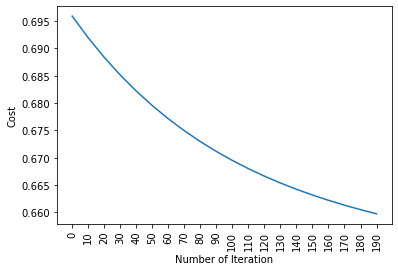

test accuracy: 64.28571428571428 %


In [19]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 200)

Cost after iteration 0: 0.695878
Cost after iteration 10: 0.608772
Cost after iteration 20: 0.569602
Cost after iteration 30: 0.547560
Cost after iteration 40: 0.533052
Cost after iteration 50: 0.522396
Cost after iteration 60: 0.514196
Cost after iteration 70: 0.507694
Cost after iteration 80: 0.502420
Cost after iteration 90: 0.498064
Cost after iteration 100: 0.494416
Cost after iteration 110: 0.491323


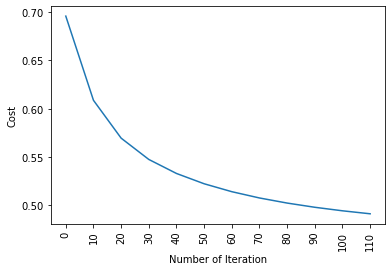

test accuracy: 77.27272727272728 %


In [20]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 4, num_iterations = 120)

* Learning rate ve iterations sayılarını ayarlayarak doğruluk oranı arttırılabilinir. (accurarcy) 
* Ancak belirli bir noktadan sonra doğruluğunuz değişmez. Cost graphda bunu gözlemleyebilirsiniz.
* Grafiğin türevi (eğim), artan iteration sayısı ile azalmaktadır (eğimin pozitif olduğunu varsayalım). Bu nedenle, belirli miktarda yinelemeden sonra maliyet fonksiyonu azalmayacaktır.


<a id="s-13"></a>
## 5. With Sklearn

In [21]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.7662337662337663 
train accuracy: 0.754071661237785 
